In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_excel(r"C:\Users\Rushika K Shankar\Downloads\netflix excel\all-weeks-countries.xlsx", sheet_name="cleaned")
print(df.head())

  country_name country_iso2        week category  weekly_rank  \
0    Argentina           AR  2025-07-20    Films            1   
1    Argentina           AR  2025-07-20    Films            2   
2    Argentina           AR  2025-07-20    Films            3   
3    Argentina           AR  2025-07-20    Films            4   
4    Argentina           AR  2025-07-20    Films            5   

                    show_title season_title  cumulative_weeks_in_top_10  \
0                        Brick          NaN                           2   
1  Lost on a Mountain in Maine          NaN                           1   
2                Almost Family          NaN                           1   
3           KPop Demon Hunters          NaN                           5   
4                      Smile 2          NaN                           1   

   Unnamed: 8           Unnamed: 9  
0         NaN                  NaN  
1         NaN                  NaN  
2         NaN                  NaN  
3         

In [4]:
print("Shape:", df.shape)
print("\nData Types:\n", df.dtypes)

Shape: (395020, 10)

Data Types:
 country_name                   object
country_iso2                   object
week                           object
category                       object
weekly_rank                     int64
show_title                     object
season_title                   object
cumulative_weeks_in_top_10      int64
Unnamed: 8                    float64
Unnamed: 9                     object
dtype: object


In [5]:
df['season_title'] = df['season_title'].fillna('N/A')

if df['cumulative_weeks_in_top_10'].isnull().any():
    df['cumulative_weeks_in_top_10'].fillna(df['cumulative_weeks_in_top_10'].mean(), inplace=True)

In [6]:
print("\nSummary Stats:\n", df.describe(include='all'))

print("\nCategory Counts:\n", df['category'].value_counts())


Summary Stats:
        country_name country_iso2        week category    weekly_rank  \
count        395020       395020      395020   395020  395020.000000   
unique           94           94         212        2            NaN   
top       Argentina           AR  2021-07-04    Films            NaN   
freq           4240         4240        1880   197510            NaN   
mean            NaN          NaN         NaN      NaN       5.500000   
std             NaN          NaN         NaN      NaN       2.872285   
min             NaN          NaN         NaN      NaN       1.000000   
25%             NaN          NaN         NaN      NaN       3.000000   
50%             NaN          NaN         NaN      NaN       5.500000   
75%             NaN          NaN         NaN      NaN       8.000000   
max             NaN          NaN         NaN      NaN      10.000000   

             show_title season_title  cumulative_weeks_in_top_10  Unnamed: 8  \
count            395020       395020  

In [7]:
avg_weeks_country = df.groupby('country_name')['cumulative_weeks_in_top_10'].mean().sort_values(ascending=False)
print("\nAverage Longevity by Country:\n", avg_weeks_country.head())


Average Longevity by Country:
 country_name
Pakistan       6.053302
Bolivia        6.042453
El Salvador    5.963443
Nicaragua      5.916274
Ecuador        5.907547
Name: cumulative_weeks_in_top_10, dtype: float64


In [8]:
top_titles = df.groupby('show_title')['cumulative_weeks_in_top_10'].max().sort_values(ascending=False).head(10)
print("\nTop 10 Titles by Longevity:\n", top_titles)


Top 10 Titles by Longevity:
 show_title
Money Heist                         127
Lottie Dottie Chicken               106
Pasión de Gavilanes                 102
Pablo Escobar, el patrón del mal    102
Chiquititas                          93
Peppa Pig                            91
Friends                              75
Kitty Kotty                          74
Shrek                                74
Red Notice                           74
Name: cumulative_weeks_in_top_10, dtype: int64


In [9]:
correlation_matrix = df.corr(numeric_only=True)
print("\nCorrelation Matrix:\n", correlation_matrix)


Correlation Matrix:
                             weekly_rank  cumulative_weeks_in_top_10  \
weekly_rank                     1.00000                     0.08712   
cumulative_weeks_in_top_10      0.08712                     1.00000   
Unnamed: 8                          NaN                         NaN   

                            Unnamed: 8  
weekly_rank                        NaN  
cumulative_weeks_in_top_10         NaN  
Unnamed: 8                         NaN  


C:\Users\Rushika K Shankar\AppData\Local\Temp\ipykernel_30164\1107517083.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_titles.values, y=top_titles.index, palette="viridis")


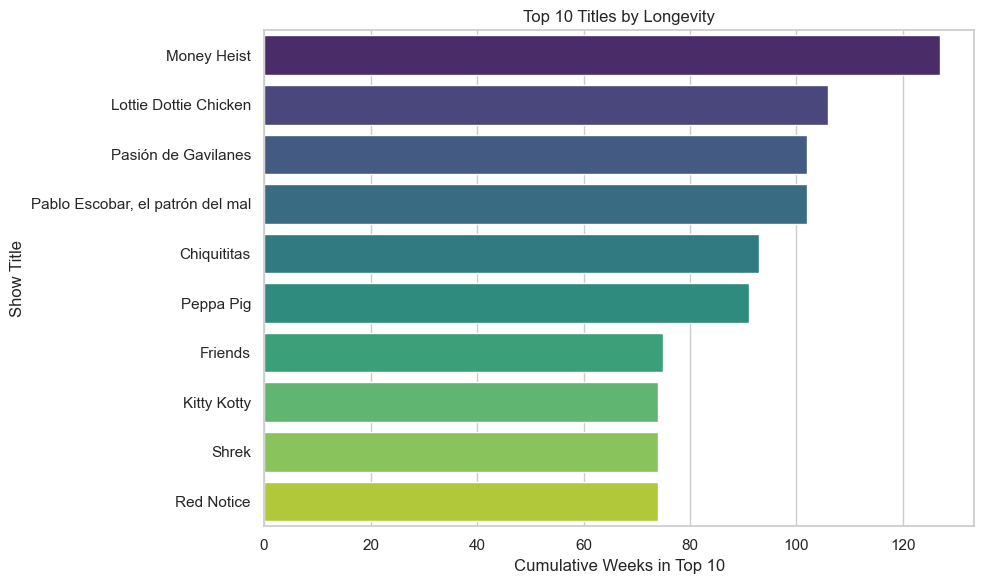

In [10]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
sns.barplot(x=top_titles.values, y=top_titles.index, palette="viridis")
plt.xlabel("Cumulative Weeks in Top 10")
plt.ylabel("Show Title")
plt.title("Top 10 Titles by Longevity")
plt.tight_layout()
plt.show()


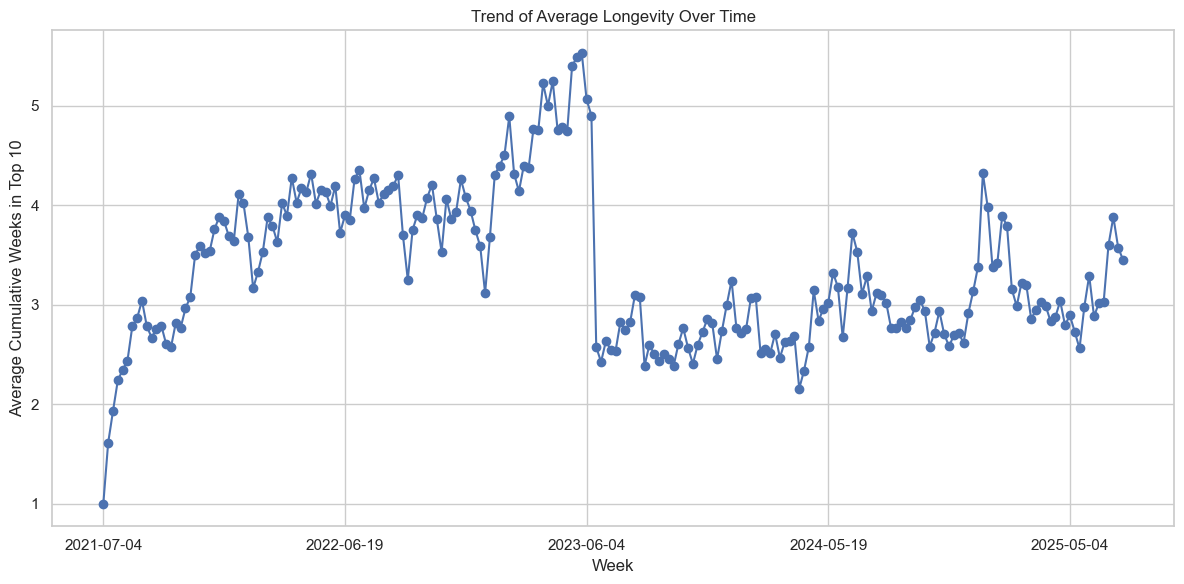

In [11]:
avg_weeks_over_time = df.groupby('week')['cumulative_weeks_in_top_10'].mean()
plt.figure(figsize=(12,6))
avg_weeks_over_time.plot(kind='line', marker='o')
plt.xlabel("Week")
plt.ylabel("Average Cumulative Weeks in Top 10")
plt.title("Trend of Average Longevity Over Time")
plt.grid(True)
plt.tight_layout()
plt.show()


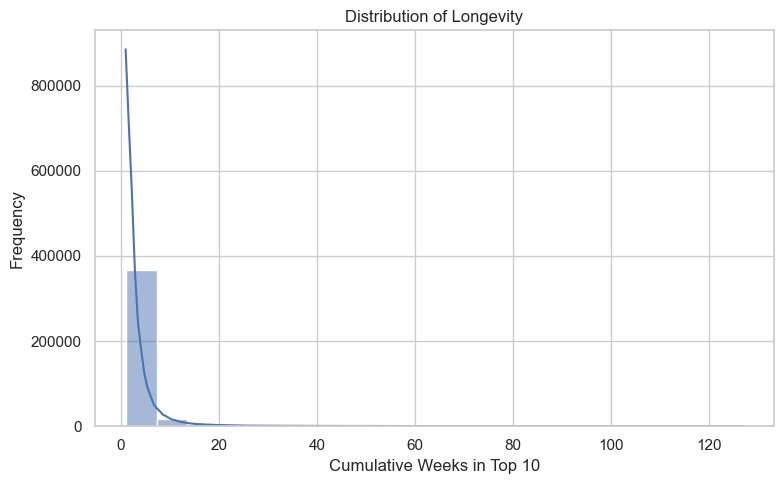

In [12]:
plt.figure(figsize=(8,5))
sns.histplot(df['cumulative_weeks_in_top_10'], bins=20, kde=True)
plt.xlabel("Cumulative Weeks in Top 10")
plt.ylabel("Frequency")
plt.title("Distribution of Longevity")
plt.tight_layout()
plt.show()

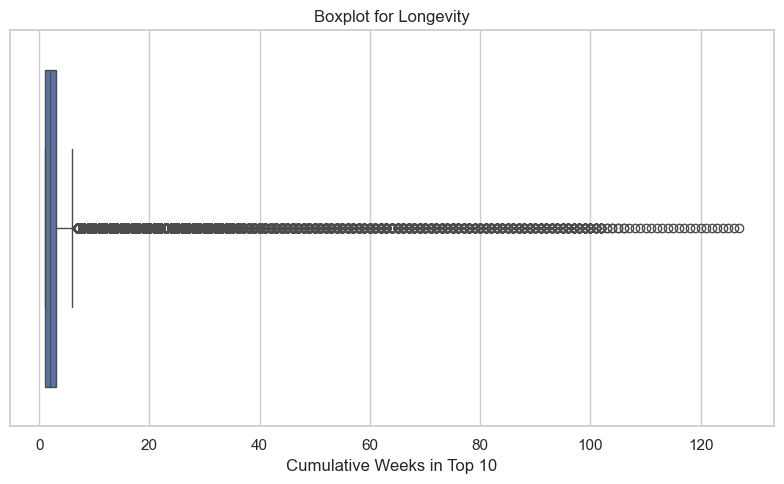

In [13]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['cumulative_weeks_in_top_10'])
plt.xlabel("Cumulative Weeks in Top 10")
plt.title("Boxplot for Longevity")
plt.tight_layout()
plt.show()

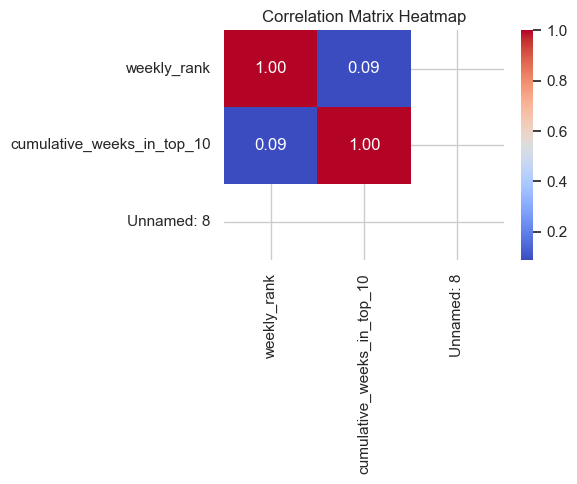

In [14]:
plt.figure(figsize=(6,5))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.tight_layout()
plt.show()